In [34]:
import os.path

import tensorflow as tf
import sklearn
import numpy as np
from evaluation_utils import get_test_data_and_labels
from data_loader_class import DataLoader
from gradcam import GradCAM

In [2]:
path = r'C:\Users\dicia\PycharmProjects\PythonProject\Experiments\290125\02\models\final_model.keras'
model = tf.keras.models.load_model(path)

In [3]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_small (Functional)     │ (None, 768)            │    49,454,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm (BatchNormalization) │ (None, 768)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,363,941 (318.01 MB)

 Trainable params: 16,854,017 (64.29 MB)

 Non-trainable params: 32,801,888 (125.13 MB)

 Optimizer params: 33,708,036 (128.59 MB)

In [6]:

test_generator = DataLoader(split='test')
images, labels = get_test_data_and_labels(test_generator)





In [19]:
preds = model.predict(images[2][np.newaxis,...])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [11]:
from sklearn.metrics import confusion_matrix

preds_int = (preds > 0.5).astype(np.int16).flatten()
con_mat = confusion_matrix(labels, preds_int)
con_mat

array([[159,  21],
       [ 44,  13]])

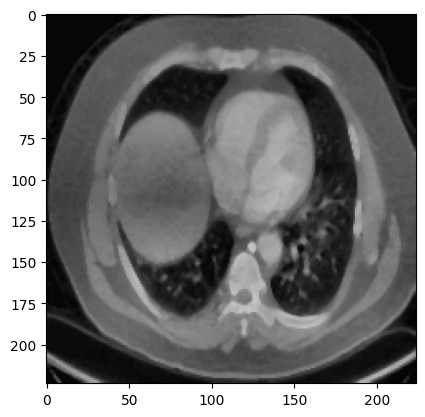

In [38]:
img = images[5]

import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()

In [50]:
# heatmap = GradCAM(model, 'convnext_small')
# heatmap.compute_heatmap(img[np.newaxis,...])

In [47]:
il = (model.get_layer('overall_input_layer'))
il.name

'overall_input_layer'